# Salary Prediction using Linear Regression

#### Importing Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading CSV file

In [68]:
sal_data = pd.read_csv('Employee_salaries.csv')
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#### Rows and Columns information

In [69]:
print(sal_data.shape)
sal_data.columns

(375, 6)


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

#### Renaming Columns

In [70]:
sal_data.columns = ['Age', 'Gender','Degree', 'Job_title','Experience_in_years','Salary']
sal_data.dtypes
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Degree               373 non-null    object 
 3   Job_title            373 non-null    object 
 4   Experience_in_years  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


#### Checking and Removing Duplicates

In [71]:
sal_data[sal_data.duplicated()]

,Age,Gender,Degree,Job_title,Experience_in_years,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [72]:
sal_data[sal_data.duplicated()].count()

Age                    49
Gender                 49
Degree                 49
Job_title              49
Experience_in_years    49
Salary                 49
dtype: int64

In [73]:
sal_data = sal_data.drop_duplicates(keep='first')
print(sal_data.head())


    Age  Gender      Degree          Job_title  Experience_in_years    Salary
0  32.0    Male  Bachelor's  Software Engineer                  5.0   90000.0
1  28.0  Female    Master's       Data Analyst                  3.0   65000.0
2  45.0    Male         PhD     Senior Manager                 15.0  150000.0
3  36.0  Female  Bachelor's    Sales Associate                  7.0   60000.0
4  52.0    Male    Master's           Director                 20.0  200000.0


In [74]:
sal_data.isnull().sum()

Age                    1
Gender                 1
Degree                 1
Job_title              1
Experience_in_years    1
Salary                 1
dtype: int64

In [75]:
sal_data.dropna(how='any',inplace=True)

In [76]:
sal_data.shape

(324, 6)

# Data Exploration and Visualization

In [77]:
sal_data.describe()

,Age,Experience_in_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [78]:
corr = sal_data[['Age','Experience_in_years','Salary']].corr()
print(corr)

                          Age  Experience_in_years    Salary
Age                  1.000000             0.979192  0.916543
Experience_in_years  0.979192             1.000000  0.924455
Salary               0.916543             0.924455  1.000000


<Axes: >

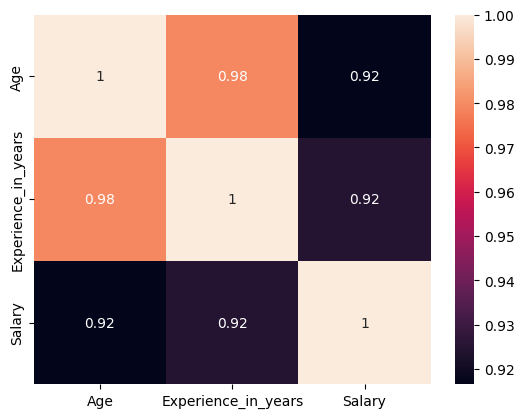

In [79]:
sns.heatmap(corr,annot = True)

In [80]:
print(sal_data.columns)
sal_data['Degree'].value_counts()

Index(['Age', 'Gender', 'Degree', 'Job_title', 'Experience_in_years',
       'Salary'],
      dtype='object')


Degree
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

In [81]:
sal_data['Job_title'].value_counts()

Job_title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64

<Axes: ylabel='Gender'>

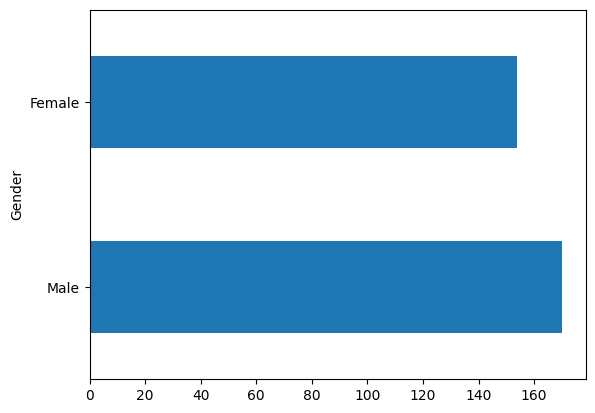

In [82]:
sal_data['Gender'].value_counts().plot(kind='barh')

#### Box plot and histogram for Numerical Values

<Axes: ylabel='Frequency'>

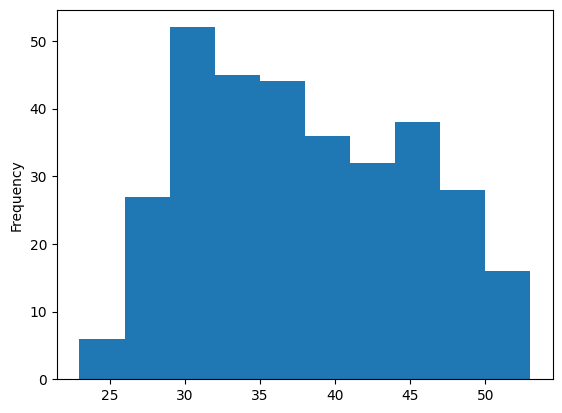

In [83]:
sal_data['Age'].plot(kind='hist')

<Axes: >

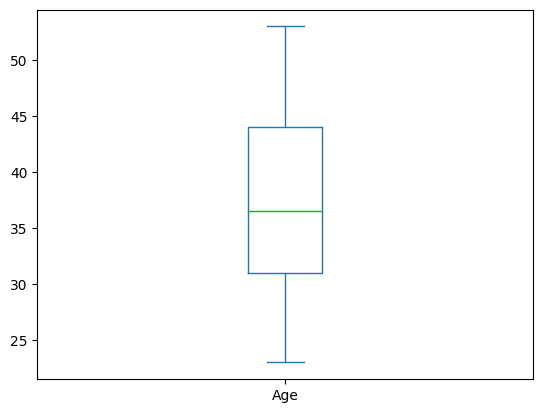

In [84]:
sal_data['Age'].plot(kind='box')

<Axes: ylabel='Frequency'>

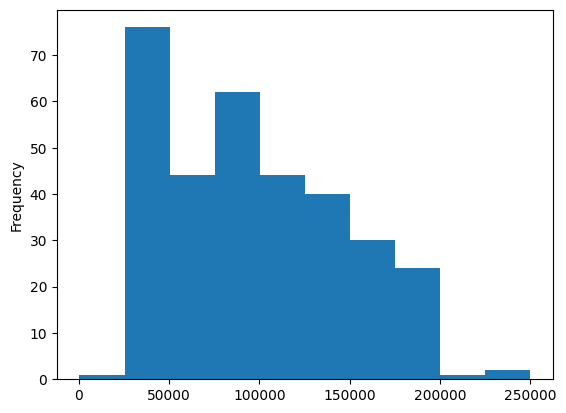

In [85]:
sal_data['Salary'].plot(kind='hist')

In [86]:
sal_data.head()

,Age,Gender,Degree,Job_title,Experience_in_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Feature Engineering

In [87]:
# Encoding

from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()

In [88]:
sal_data['Gender_encode'] = labels.fit_transform(sal_data['Gender'])
sal_data['Degree_encode'] = labels.fit_transform(sal_data['Degree'])
sal_data['Job_title_encode'] = labels.fit_transform(sal_data['Job_title'])
sal_data.head()

,Age,Gender,Degree,Job_title,Experience_in_years,Salary,Gender_encode,Degree_encode,Job_title_encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


#### Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()

In [90]:
sal_data['Age_scaled'] = std_scalar.fit_transform(sal_data[['Age']])
sal_data['Experience_in_years_scaled'] = std_scalar.fit_transform(sal_data[['Experience_in_years']])

In [91]:
sal_data.head()

,Age,Gender,Degree,Job_title,Experience_in_years,Salary,Gender_encode,Degree_encode,Job_title_encode,Age_scaled,Experience_in_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


#### Dependent and Independent Features

In [92]:
x = sal_data[['Age_scaled','Gender_encode', 'Degree_encode','Job_title_encode','Experience_in_years_scaled']]
y = sal_data['Salary']

In [93]:
x.head()

,Age_scaled,Gender_encode,Degree_encode,Job_title_encode,Experience_in_years_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


#### Splitting Data for Training and Testing

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
x_train.shape

(259, 5)

# Model Development

In [96]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#### Model Training

In [97]:
lr.fit(x_train,y_train)

LinearRegression()

#### Model Predictions

In [98]:
y_pred = lr.predict(x_test)
y_pred

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [99]:
df = pd.DataFrame({'Y_actual':y_test,'Y_predicted':y_pred})
df['Error'] = df['Y_actual'] - df['Y_predicted']
df['Abs_error'] = abs(df['Error'])
Mean_absolute_error = df['Abs_error'].mean()
Mean_absolute_error

10570.786401136173

#### Model Evaluation

In [100]:
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error
from sklearn.metrics import mean_squared_error

In [101]:
r2_score(y_test,y_pred)

0.8911231066517089

In [102]:
print('The Accuracy of the model is', str(round(r2_score(y_test,y_pred),4)*100)+'%')

The Accuracy of the model is 89.11%


#### Coefficients and Intercept

In [103]:
lr.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
       1.92043082e+04])

In [104]:
lr.intercept_

86001.49320553175

In [108]:
Age = int(input("Enter the Age of the person: "))
Age = std_scalar.transform([[49]])[0][0]
Gender = 0
# if Gender == 'f':
#     Gender = 0
# else:
#     Gender = 1
Degree = 2 #Ph.D
Job_title = 22 # Director
Experience = 15

Experience = std_scalar.transform([[15]])[0][0]

print(Age)
print(Gender)
print(Degree)
print(Job_title)
print(Experience)

5.864486769962798
0
2
22
0.7441581452572275


c:\Users\gowth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\gowth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [110]:
Emp_salary = lr.predict([[Age,Gender,Degree,Job_title,Experience]])
Emp_salary[0]

c:\Users\gowth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


249925.15052544308